In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

In [3]:
# repeating the data prep from the previous notebook
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# one-hot encoding:
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving layers.py to layers.py
Saving layer_utils.py to layer_utils.py
Saving fc_net.py to fc_net.py


In [6]:
# Here we import an implementation of a two-layer neural network 
# this code is based on pieces of the first assignment from Stanford's CSE231n course, 
# hosted at https://github.com/cs231n/cs231n.github.io with the MIT license
from fc_net import TwoLayerNet

In [34]:
num_features = x_train.shape[1] # this is the number of pixels
# The weights are initialized from a normal distribution with standard deviation weight_scale
model = TwoLayerNet(input_dim=num_features, hidden_dim=200, num_classes=nb_classes, weight_scale=.01)

In [35]:
# here you can take a look if you want at the initial loss from an untrained network
loss, gradients = model.loss(x_train, y_train_onehot)

In [37]:
# a simple implementation of stochastic gradient descent
def sgd(model, gradients, learning_rate):
    for p, w in model.params.items():
        dw = gradients[p]
        new_weights = w - learning_rate * dw
        model.params[p] = new_weights
    return model

In [38]:
# one training step
def learn(model, x_train, y_train_onehot, learning_rate):
    loss, gradients = model.loss(x_train, y_train_onehot)
    model = sgd(model, gradients, learning_rate)
    return loss, model

In [39]:
def accuracy(model, x, true_values):
    scores = model.loss(x)
    predictions = numpy.argmax(scores, axis=1)
    N = predictions.shape[0]
    acc = (true_values == predictions).sum() / N
    return acc

epoch 0, loss 2.18869, accuracy 0.57
epoch 1, loss 1.58227, accuracy 0.68
epoch 2, loss 0.96213, accuracy 0.79
epoch 3, loss 0.71294, accuracy 0.83
epoch 4, loss 0.59138, accuracy 0.85
epoch 5, loss 0.52907, accuracy 0.87
epoch 6, loss 0.51252, accuracy 0.88
epoch 7, loss 0.43972, accuracy 0.88
epoch 8, loss 0.40520, accuracy 0.89
epoch 9, loss 0.38951, accuracy 0.89
epoch 10, loss 0.39415, accuracy 0.89
epoch 11, loss 0.38445, accuracy 0.90
epoch 12, loss 0.35502, accuracy 0.90
epoch 13, loss 0.34861, accuracy 0.90
epoch 14, loss 0.30564, accuracy 0.90
epoch 15, loss 0.31892, accuracy 0.90
epoch 16, loss 0.32067, accuracy 0.91
epoch 17, loss 0.30100, accuracy 0.91
epoch 18, loss 0.31447, accuracy 0.91
epoch 19, loss 0.33280, accuracy 0.91
epoch 20, loss 0.33023, accuracy 0.91
epoch 21, loss 0.33751, accuracy 0.91
epoch 22, loss 0.28768, accuracy 0.91
epoch 23, loss 0.32150, accuracy 0.92
epoch 24, loss 0.30495, accuracy 0.92
epoch 25, loss 0.29203, accuracy 0.92
epoch 26, loss 0.27577

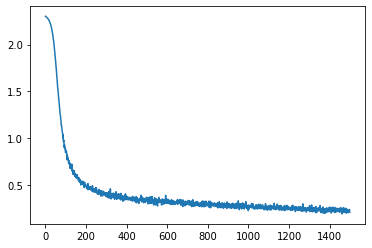

In [40]:
# Here's an example training loop using this two-layer model. Can you do better? 
learning_rate = 0.1 
num_examples = x_train.shape[0]
batch_size = 2000
num_batches = int(num_examples / batch_size)
num_epochs = 50
losses = numpy.zeros(num_batches*num_epochs,)
indices = numpy.arange(num_examples)

i = 0
for epoch in range(0, num_epochs):
    # in each epoch, we loop over all of the training examples
    for step in range(0, num_batches):
        # grabbing the next batch
        offset = step * batch_size
        batch_range = range(offset, offset+batch_size)
        x_train_batch = x_train[batch_range, :]
        y_train_batch = y_train_onehot[batch_range,:]
        
        # feed the next batch in to do one sgd step
        loss, model = learn(model, x_train_batch, y_train_batch, learning_rate)
        losses[i] = loss
        i += 1

    acc = accuracy(model, x_train, y_train)
    print("epoch %d, loss %.5f, accuracy %.2f" % (epoch, loss, acc))
    
    # reshuffle the data so that we get a new set of batches
    numpy.random.shuffle(indices)
    x_train = x_train[indices,:]
    y_train = y_train[indices] # keep this shuffled the same way for use in accuracy calculation
    y_train_onehot = y_train_onehot[indices,:]
plt.plot(losses)

In [41]:
accuracy(model, x_train, y_train)

0.9382833333333334

# Homework: improve the accuracy of this model. 

Update this notebook so that the accuracy is improved. How high can you get it? You could change things directly in the notebook, such as increasing the number of epochs, changing the learning weight, changing the width of the hidden layer, etc. If you're more ambitious, you could also try changing the model definition itself by checking out the associated Python files. For example, you could add more layers to the network. The current notebook has a training accuracy of about 43%, but will vary with randomness.

Trial 1: Increasing the number of epochs from 10 to 50 improved the accurcy from 43% to 65%

Trial 2: Keeping the epochs at 50 and increasing the learning rate to 0.05 improved the accuracy from 65% for the rate of 0.01 to 87% for the rate of 0.05.

Trial 3: Further, decreasing the batch size from 10000 to 5000, while keeping the epochs at 50 and learning rate at 0.05 the accuracy improved from 87% to 91%.

Trial 4: Further decreasing of the batch size from 5000 to 2000 offered only a moderate improvement in the accuracy from 91% to 93%.



Trial 5: Increasing the LR to 0.1 from 0.05 offered further improvement in the accuracy from the previous value of 93% to 96%.

Trial 6: Further, increasing the number of epochs even more from 50 to 100 improved the accuracy from 96% to 98% but at the cost of increased execution time.

Trial 7: Increasing the width of the hidden layer to 500 (from 300) and going back to 50 epochs, I obtained the accuracy of 94%. Does this mean increasing the hidden layer width does not help very much? I am going to try decreasing the hidden layer width to 200.

Trial 8: Decreasing the width of the hidden layer to 200 (from 300) and going back to 50 epochs, I obtained the accuracy of 94%. So it looks like hidden layer width of 300 is somehow optimized for the NN structure. Further work may be required to change the NN structure. More on that later when time permits.